# **Fossil Age**

## **Data Collection**

## Objectives

* Fetch data from Kaggle
* Prepare data for further processes

## Data

The dataset used in this analysis was sourced from Kaggle.com (https://www.kaggle.com/datasets/stealthtechnologies/predict-the-age-of-a-fossil/data).

The Fossil dataset was created to provide a comprehensive and realistic foundation for training and evaluating machine learning models aimed at predicting fossil ages, it includes a variety of geological, chemical, and physical attributes that are significant in the study of fossil formation and preservation.

### Features

* **uranium_lead_ratio**: Ratio of uranium to lead isotopes in the fossil sample.

* **carbon_14_ratio**: Ratio of carbon-14 isotopes present in the fossil sample.

* **radioactive_decay_series**: Measurement of the decay series from parent to daughter isotopes.

* **stratigraphic_layer_depth**: Depth of the fossil within the stratigraphic layer, in meters.

* **isotopic_composition**: Proportion of different isotopes within the fossil sample.

* **fossil_size**: Size of the fossil, in centimeters.

* **fossil_weight**: Weight of the fossil, in grams.

* **geological_period**: Geological period during which the fossil was formed.

* **surrounding_rock_type**: Type of rock surrounding the fossil.

* **paleomagnetic_data**: Paleomagnetic orientation data of the fossil site.

* **stratigraphic_position**: Position of the fossil within the stratigraphic column.

* **age**: Calculated age of the fossil based on various features, in years.

---

## Install the required libraries

In [1]:
%pip install kaggle pandas numpy seaborn matplotlib plotly scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


## Change working directory

* to save the data in a subfolder that is separate from the notebooks, we need to change the working directory from its current folder to its parent folder.

* We access the current directory with os.getcwd()

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Victo\\IBM-machine-learning-certification\\EDA\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Victo\\IBM-machine-learning-certification\\EDA'

## Reading and Understanding Our Data

Download the data.

In [6]:
!kaggle datasets download -d "stealthtechnologies/predict-the-age-of-a-fossil"

Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/predict-the-age-of-a-fossil


  0%|          | 0.00/302k [00:00<?, ?B/s]
100%|██████████| 302k/302k [00:00<00:00, 844kB/s]
100%|██████████| 302k/302k [00:00<00:00, 844kB/s]



License(s): MIT



Extract data from the zipfile into a new subfolder in the current directory.

In [7]:
import zipfile
with zipfile.ZipFile("predict-the-age-of-a-fossil.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

Delete zipfile after the csv files have been extracted.

In [8]:
if os.path.exists("predict-the-age-of-a-fossil.zip"):
  os.remove("predict-the-age-of-a-fossil.zip")
else:
  print("The file does not exist")

Read data from the files.

In [9]:
df1 = pd.read_csv("data/test_data.csv")
df1.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.469986         1.000000                  0.667595   
1            0.619865         0.474208                  1.218381   
2            0.767736         0.478731                  0.119801   
3            0.275121         0.400594                  0.634760   
4            0.407470         0.039705                  0.824597   

   stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                      29.58          Triassic    Normal polarity   
1                      69.87        Cretaceous  Reversed polarity   
2                      96.38        Cretaceous    Normal polarity   
3                     134.10          Triassic    Normal polarity   
4                     124.10          Triassic    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.583560             Limestone   
1                        True              0.942719                 Shale   
2                       False              0.377531             Sandstone   
3                        True              0.323820             Sandstone   
4                       False              1.219120                 Shale   

  stratigraphic_position  fossil_size  fossil_weight    age  
0                 Bottom       120.12          73.83  41072  
1                 Middle        72.82         191.68  42085  
2                 Bottom       105.47          82.25  50436  
3                 Middle        94.99          47.99  25923  
4                 Middle       139.93         532.62  30272

In [10]:
df2 = pd.read_csv("data/train_data.csv")
df2.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                      91.17        Cretaceous    Normal polarity   
1                     165.44          Cambrian    Normal polarity   
2                     218.98          Cambrian    Normal polarity   
3                      51.09           Permian    Normal polarity   
4                     313.72          Devonian    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.915951          Conglomerate   
1                       False              0.803968             Limestone   
2                        True              0.792441                 Shale   
3                        True              0.074636             Limestone   
4                        True              1.646640                 Shale   

  stratigraphic_position  fossil_size  fossil_weight    age  
0                 Middle        50.65         432.00  43523  
1                    Top        48.85         353.29  44112  
2                 Bottom        37.66         371.33  43480  
3                 Bottom        39.10         232.84  30228  
4                    Top        90.84         277.67  67217

Inspect features and data types of data.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          1100 non-null   float64
 1   carbon_14_ratio             1100 non-null   float64
 2   radioactive_decay_series    1100 non-null   float64
 3   stratigraphic_layer_depth   1100 non-null   float64
 4   geological_period           1100 non-null   object 
 5   paleomagnetic_data          1100 non-null   object 
 6   inclusion_of_other_fossils  1100 non-null   bool   
 7   isotopic_composition        1100 non-null   float64
 8   surrounding_rock_type       1100 non-null   object 
 9   stratigraphic_position      1100 non-null   object 
 10  fossil_size                 1100 non-null   float64
 11  fossil_weight               1100 non-null   float64
 12  age                         1100 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

Make a list of column headers in both dataframes and compare to confirm the headers match. 

In [13]:
df1.columns.values.tolist() == df2.columns.values.tolist()

True

Concatenate the dataframes and remove any duplicate observations.

In [14]:
frames = [df1, df2]
fossils = pd.concat(frames, ignore_index=True)
fossils.drop_duplicates()
fossils

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0               0.469986         1.000000                  0.667595   
1               0.619865         0.474208                  1.218381   
2               0.767736         0.478731                  0.119801   
3               0.275121         0.400594                  0.634760   
4               0.407470         0.039705                  0.824597   
...                  ...              ...                       ...   
5493            0.049660         0.601750                  0.762490   
5494            0.360085         0.215033                  1.002406   
5495            0.464864         0.553313                  0.659639   
5496            0.803338         0.272392                  0.123562   
5497            0.321577         0.348233                  0.265161   

      stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                         29.58          Triassic    Normal polarity   
1                         69.87        Cretaceous  Reversed polarity   
2                         96.38        Cretaceous    Normal polarity   
3                        134.10          Triassic    Normal polarity   
4                        124.10          Triassic    Normal polarity   
...                         ...               ...                ...   
5493                     222.54          Jurassic  Reversed polarity   
5494                     276.70        Cretaceous  Reversed polarity   
5495                      76.77          Devonian    Normal polarity   
5496                     204.82           Neogene  Reversed polarity   
5497                     436.61        Cretaceous    Normal polarity   

      inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                          False              0.583560             Limestone   
1                           True              0.942719                 Shale   
2                          False              0.377531             Sandstone   
3                           True              0.323820             Sandstone   
4                          False              1.219120                 Shale   
...                          ...                   ...                   ...   
5493                        True              2.247495             Sandstone   
5494                        True              1.004584          Conglomerate   
5495                        True              0.721947          Conglomerate   
5496                        True              1.496427             Sandstone   
5497                        True              0.256842             Sandstone   

     stratigraphic_position  fossil_size  fossil_weight    age  
0                    Bottom       120.12          73.83  41072  
1                    Middle        72.82         191.68  42085  
2                    Bottom       105.47          82.25  50436  
3                    Middle        94.99          47.99  25923  
4                    Middle       139.93         532.62  30272  
...                     ...          ...            ...    ...  
5493                 Bottom        91.69         415.13  26606  
5494                 Bottom        68.97         121.10  44850  
5495                 Middle        11.37         288.73  32186  
5496                 Bottom       132.34         518.31  59888  
5497                    Top         1.70         279.37  40809  

[5498 rows x 13 columns]

In [15]:
fossils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5498 entries, 0 to 5497
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          5498 non-null   float64
 1   carbon_14_ratio             5498 non-null   float64
 2   radioactive_decay_series    5498 non-null   float64
 3   stratigraphic_layer_depth   5498 non-null   float64
 4   geological_period           5498 non-null   object 
 5   paleomagnetic_data          5498 non-null   object 
 6   inclusion_of_other_fossils  5498 non-null   bool   
 7   isotopic_composition        5498 non-null   float64
 8   surrounding_rock_type       5498 non-null   object 
 9   stratigraphic_position      5498 non-null   object 
 10  fossil_size                 5498 non-null   float64
 11  fossil_weight               5498 non-null   float64
 12  age                         5498 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

According to the output above, we have 5498 entries, 0 to 5497, as well as 12 features. Our target or response variable is 'age'.

We also have a mix of numerical (1 int64 target variable and 7 float64 features), 4 object data types and 1 bool data type.

View statistical information about each numerical value column.

In [16]:
stats_df = fossils.describe()
stats_df

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         5498.000000      5498.000000               5498.000000   
mean             0.488838         0.432231                  0.535231   
std              0.257185         0.235628                  0.288837   
min              0.000241         0.000244                  0.000076   
25%              0.296790         0.247020                  0.316775   
50%              0.475428         0.418902                  0.518653   
75%              0.661999         0.593708                  0.729653   
max              1.533270         1.000000                  1.527375   

       stratigraphic_layer_depth  isotopic_composition  fossil_size  \
count                5498.000000           5498.000000  5498.000000   
mean                  153.875369              0.941980    70.455324   
std                    87.163969              0.524836    37.139330   
min                     0.130000              0.000275     0.130000   
25%                    85.600000              0.541475    42.177500   
50%                   146.355000              0.904556    68.670000   
75%                   214.322500              1.290393    96.110000   
max                   522.110000              3.148906   216.390000   

       fossil_weight            age  
count    5498.000000    5498.000000  
mean      325.355045   40719.702619  
std       187.474695   15280.996957  
min         0.050000    4208.000000  
25%       179.582500   29711.250000  
50%       308.120000   39725.000000  
75%       454.820000   50622.000000  
max      1010.090000  103079.000000

Determine the mean, median, and quantiles and ranges (max-min) for each numerical feature and the target value.

In [17]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
mean              0.488838         0.432231                  0.535231   
25%               0.296790         0.247020                  0.316775   
median            0.475428         0.418902                  0.518653   
75%               0.661999         0.593708                  0.729653   
range             1.533029         0.999756                  1.527299   

        stratigraphic_layer_depth  isotopic_composition  fossil_size  \
mean                   153.875369              0.941980    70.455324   
25%                     85.600000              0.541475    42.177500   
median                 146.355000              0.904556    68.670000   
75%                    214.322500              1.290393    96.110000   
range                  521.980000              3.148631   216.260000   

        fossil_weight           age  
mean       325.355045  40719.702619  
25%        179.582500  29711.250000  
median     308.120000  39725.000000  
75%        454.820000  50622.000000  
range     1010.040000  98871.000000

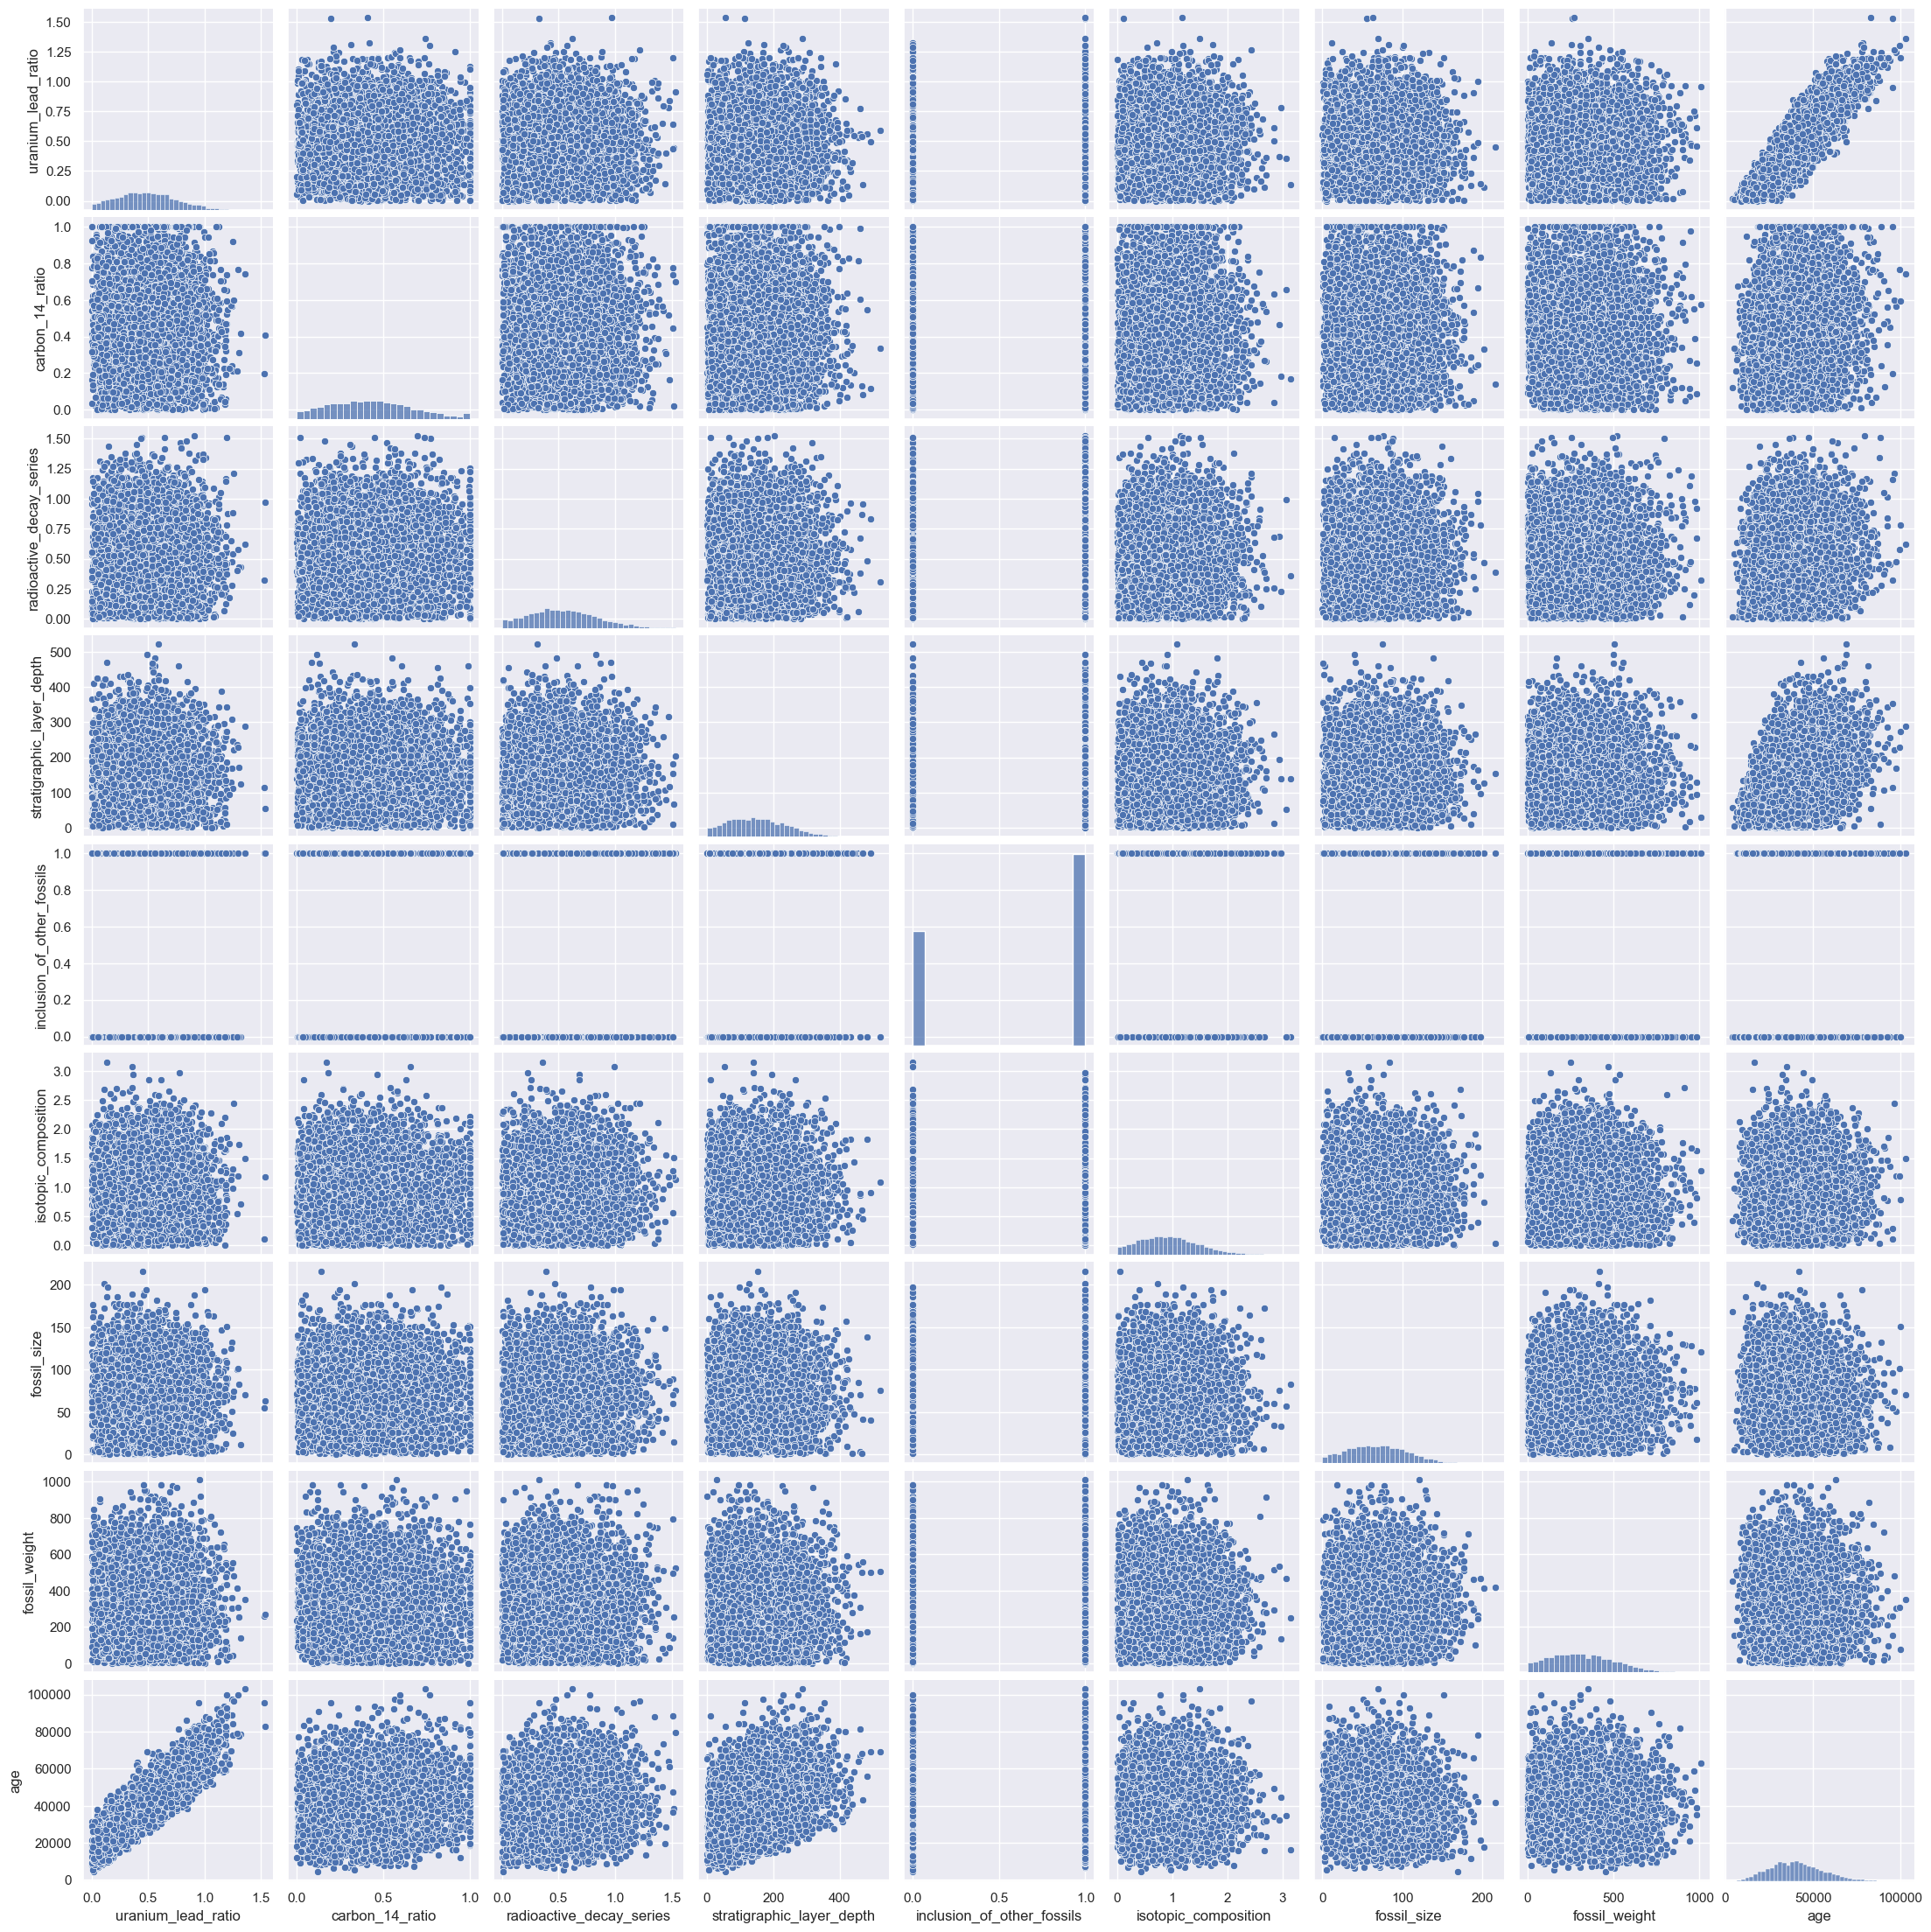

In [18]:
#sns.set_context('talk')
sns.set_theme(font_scale=1)
sns.pairplot(fossils);

<Axes: xlabel='age', ylabel='geological_period'>

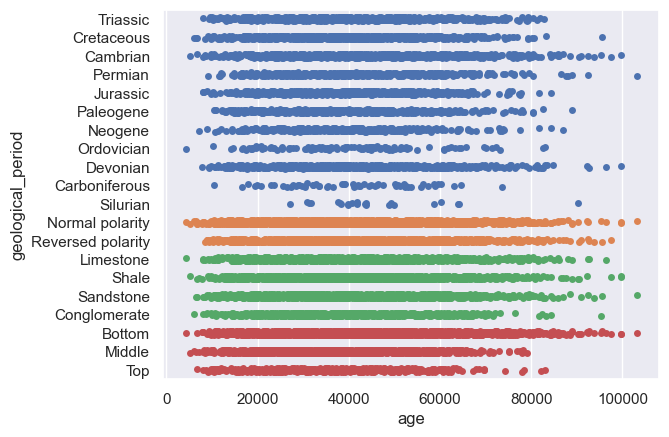

In [19]:
sns.stripplot(data=fossils, x="age", y="geological_period", legend=False)
sns.stripplot(data=fossils, x="age", y="paleomagnetic_data", legend=False)
sns.stripplot(data=fossils, x="age", y="surrounding_rock_type", legend=False)
sns.stripplot(data=fossils, x="age", y="stratigraphic_position", legend=False)

### Detect Outliers

Box plots will be used to identify any possible outliers in our data.

<Axes: xlabel='uranium_lead_ratio'>

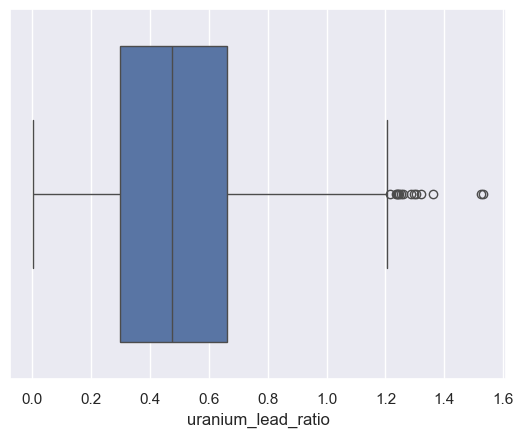

In [20]:
sns.boxplot(x=fossils['uranium_lead_ratio'])

In [21]:
fossils[fossils['uranium_lead_ratio'] > 1.4]

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
1765            1.524921         0.196071                  0.324576   
4414            1.533270         0.407010                  0.967435   

      stratigraphic_layer_depth geological_period paleomagnetic_data  \
1765                     113.81        Cretaceous  Reversed polarity   
4414                      54.18        Ordovician    Normal polarity   

      inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
1765                        True              0.108539             Sandstone   
4414                        True              1.176106             Sandstone   

     stratigraphic_position  fossil_size  fossil_weight    age  
1765                 Bottom        54.99         261.35  95549  
4414                    Top        63.29         270.25  83034

<Axes: xlabel='carbon_14_ratio'>

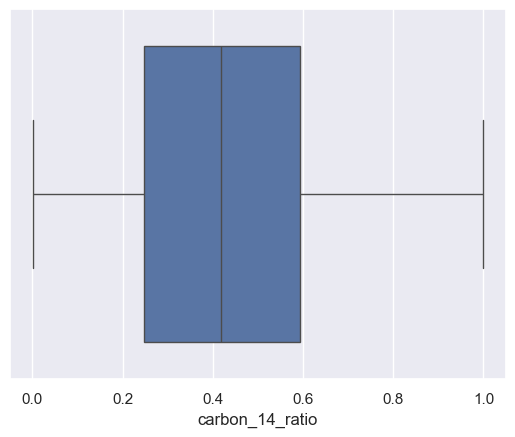

In [22]:
sns.boxplot(x=fossils['carbon_14_ratio'])

<Axes: xlabel='radioactive_decay_series'>

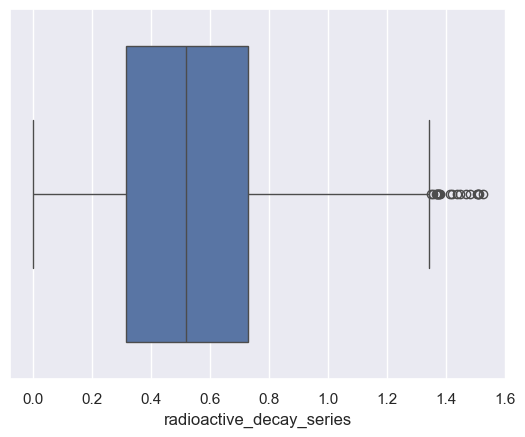

In [23]:
sns.boxplot(x=fossils['radioactive_decay_series'])

In [24]:
# data cleaning 
fossils["age"].describe()

count      5498.000000
mean      40719.702619
std       15280.996957
min        4208.000000
25%       29711.250000
50%       39725.000000
75%       50622.000000
max      103079.000000
Name: age, dtype: float64

*From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section.*

*From the above analysis we can note that the minimum value is greater than 0*

*25,500, 10,014, 10,897, 50,457*

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

### Encoding Categorical Variables:

In [25]:
fossils.geological_period.unique().tolist()

['Triassic',
 'Cretaceous',
 'Cambrian',
 'Permian',
 'Jurassic',
 'Paleogene',
 'Neogene',
 'Ordovician',
 'Devonian',
 'Carboniferous',
 'Silurian']

In [26]:
#oe = OrdinalEncoder()

gperiods = [
    'Neogene',
    'Paleogene',
    'Cretaceous',
    'Jurassic',
    'Triassic',
    'Permian',
    'Carboniferous',
    'Devonian',
    'Silurian',
    'Ordovician',
    'Cambrian'
]

gperiods_enc = OrdinalEncoder(categories=[gperiods], dtype=int)

fossils['geological_period'] = gperiods_enc.fit_transform(fossils[['geological_period']])

In [27]:
fossils.stratigraphic_position.unique().tolist()

['Bottom', 'Middle', 'Top']

In [28]:
sposition = ['Bottom', 'Middle', 'Top']

sposition_enc = OrdinalEncoder(categories=[sposition], dtype=int)

fossils['stratigraphic_position'] = sposition_enc.fit_transform(fossils[['stratigraphic_position']])

In [29]:
fossils.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.469986         1.000000                  0.667595   
1            0.619865         0.474208                  1.218381   
2            0.767736         0.478731                  0.119801   
3            0.275121         0.400594                  0.634760   
4            0.407470         0.039705                  0.824597   

   stratigraphic_layer_depth  geological_period paleomagnetic_data  \
0                      29.58                  4    Normal polarity   
1                      69.87                  2  Reversed polarity   
2                      96.38                  2    Normal polarity   
3                     134.10                  4    Normal polarity   
4                     124.10                  4    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.583560             Limestone   
1                        True              0.942719                 Shale   
2                       False              0.377531             Sandstone   
3                        True              0.323820             Sandstone   
4                       False              1.219120                 Shale   

   stratigraphic_position  fossil_size  fossil_weight    age  
0                       0       120.12          73.83  41072  
1                       1        72.82         191.68  42085  
2                       0       105.47          82.25  50436  
3                       1        94.99          47.99  25923  
4                       1       139.93         532.62  30272

In [30]:
fossils.paleomagnetic_data.unique().tolist()

['Normal polarity', 'Reversed polarity']

In [31]:
enc = OrdinalEncoder(dtype=int)

fossils[['paleomagnetic_data', 'surrounding_rock_type']] = enc.fit_transform(fossils[['paleomagnetic_data', 'surrounding_rock_type']])

In [32]:
fossils.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.469986         1.000000                  0.667595   
1            0.619865         0.474208                  1.218381   
2            0.767736         0.478731                  0.119801   
3            0.275121         0.400594                  0.634760   
4            0.407470         0.039705                  0.824597   

   stratigraphic_layer_depth  geological_period  paleomagnetic_data  \
0                      29.58                  4                   0   
1                      69.87                  2                   1   
2                      96.38                  2                   0   
3                     134.10                  4                   0   
4                     124.10                  4                   0   

   inclusion_of_other_fossils  isotopic_composition  surrounding_rock_type  \
0                       False              0.583560                      1   
1                        True              0.942719                      3   
2                       False              0.377531                      2   
3                        True              0.323820                      2   
4                       False              1.219120                      3   

   stratigraphic_position  fossil_size  fossil_weight    age  
0                       0       120.12          73.83  41072  
1                       1        72.82         191.68  42085  
2                       0       105.47          82.25  50436  
3                       1        94.99          47.99  25923  
4                       1       139.93         532.62  30272

In [ ]:
fossils.surrounding_rock_type.unique().tolist()

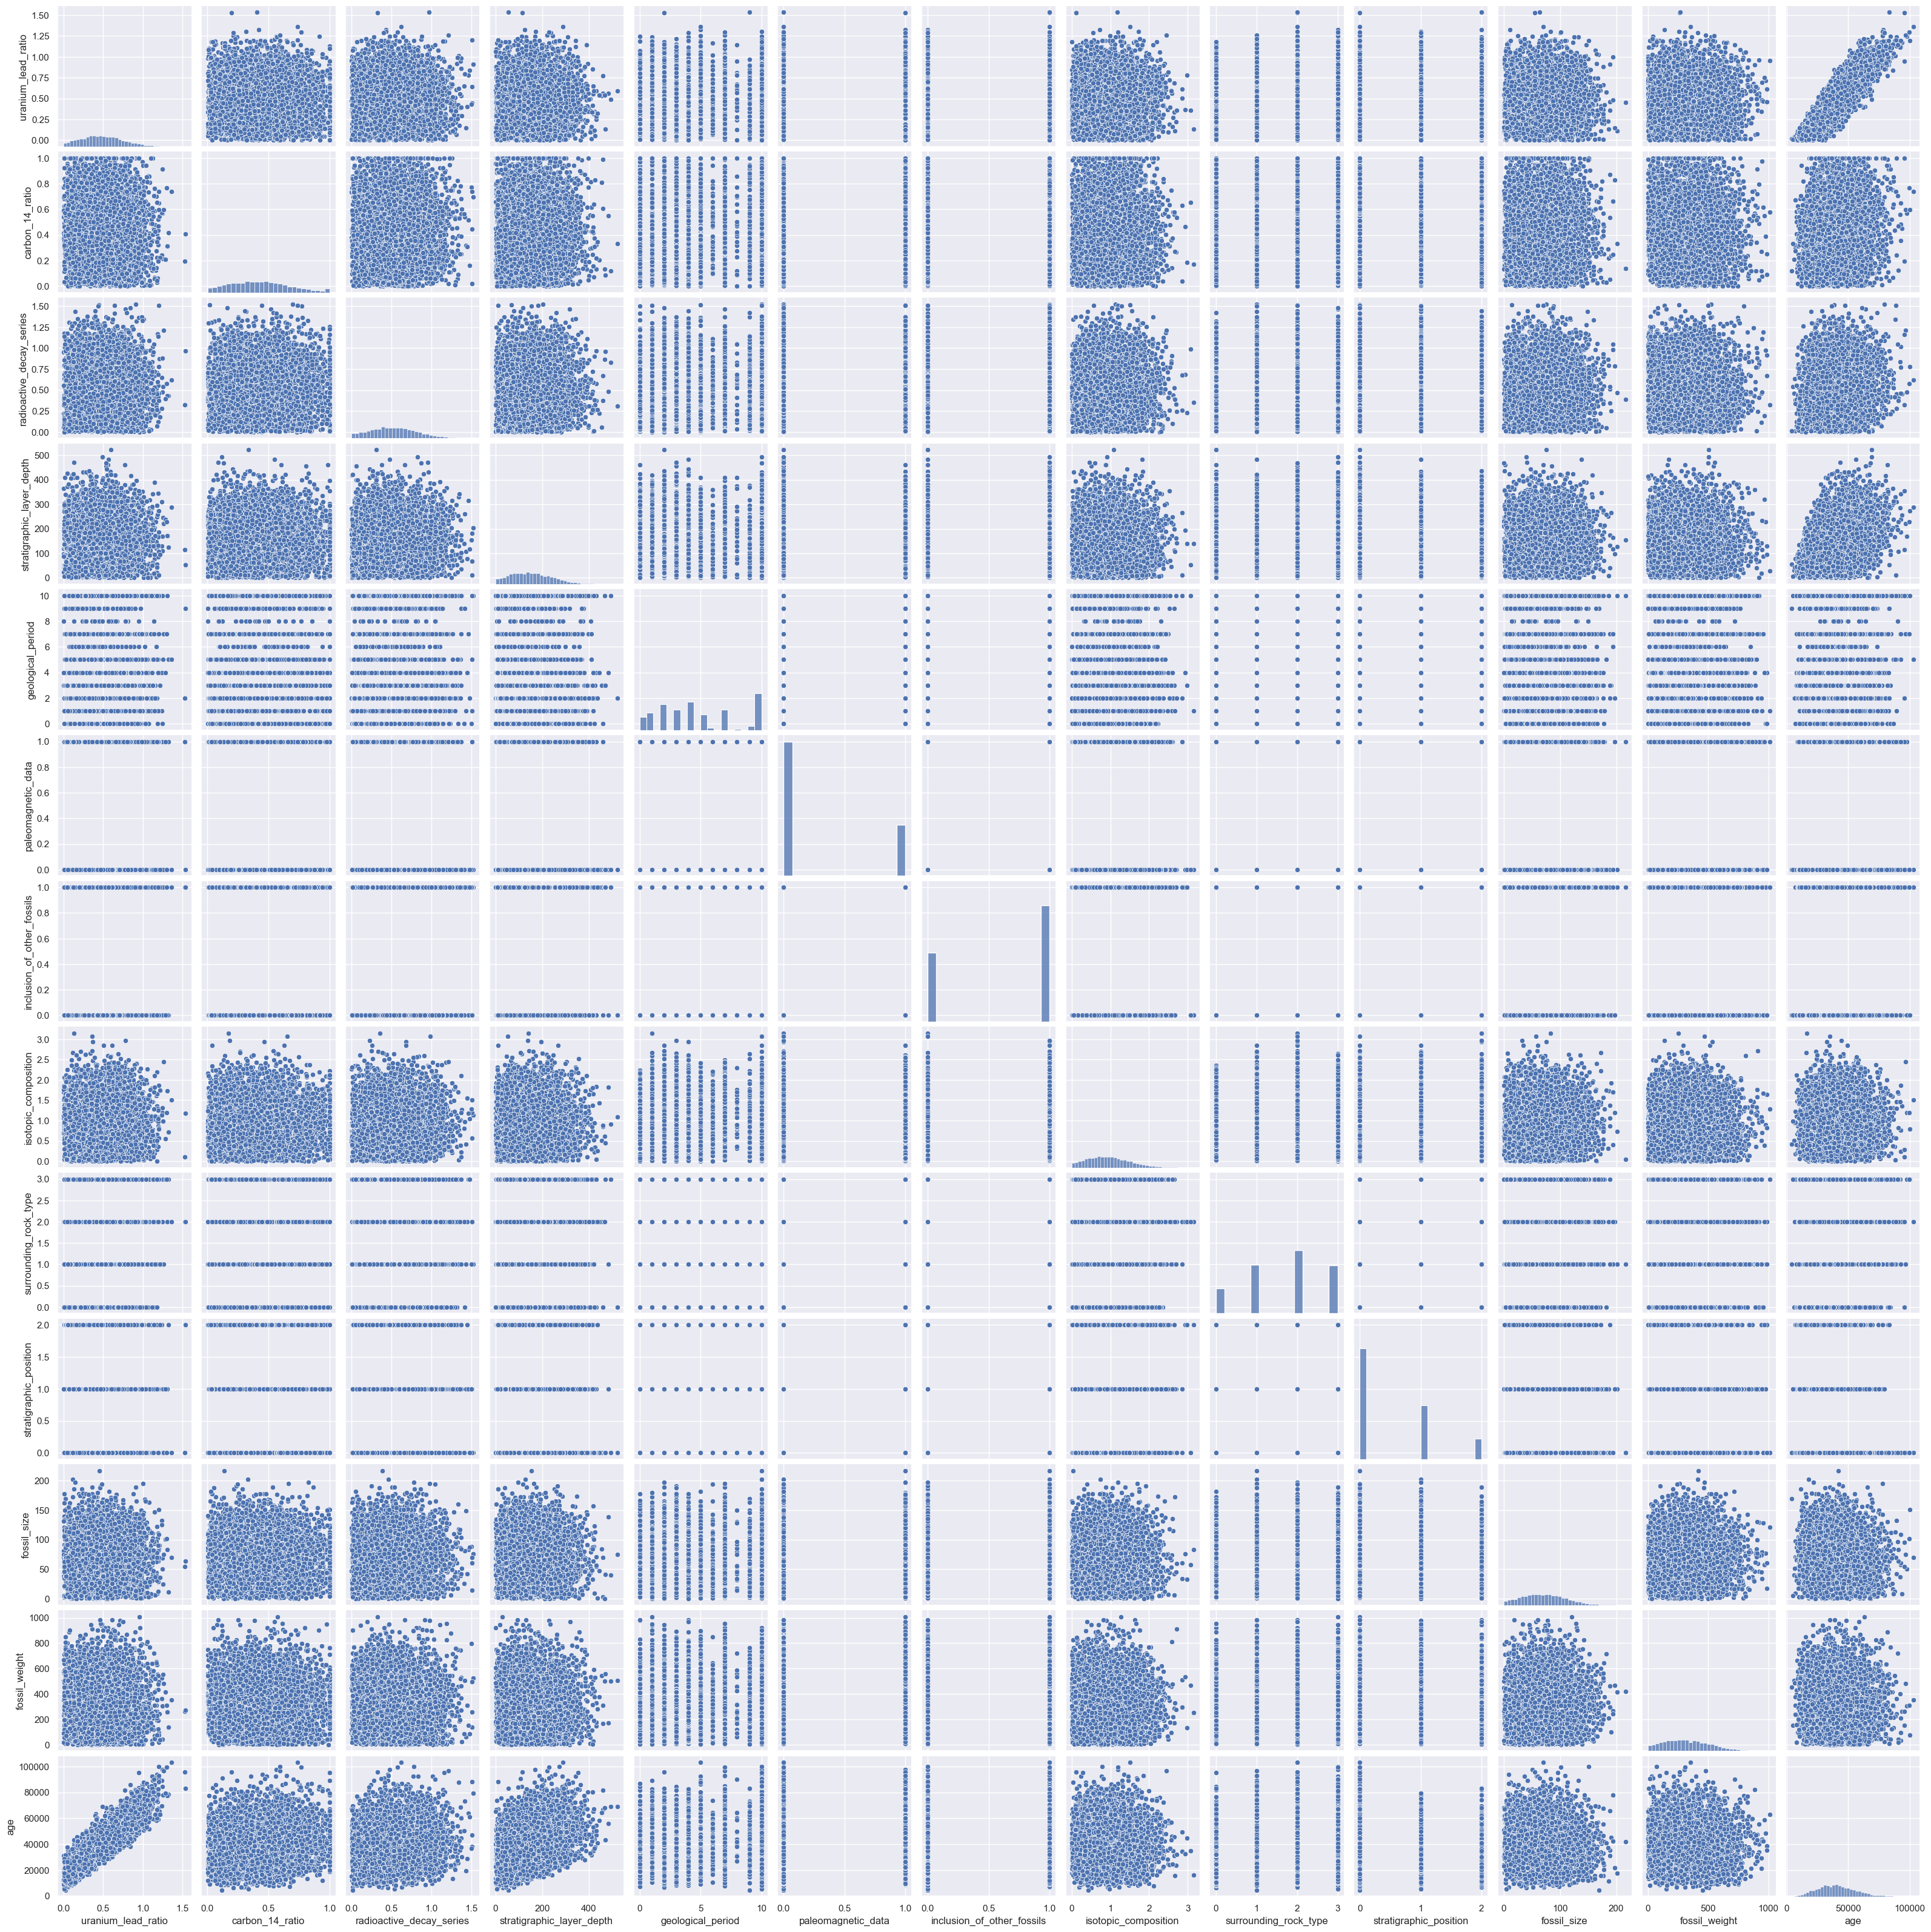

In [35]:
sns.set_context('talk')
sns.set_theme(font_scale=1)
sns.pairplot(fossils)

In [ ]:
# demo feature engineering
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = fossils.dtypes[fossils.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

fossils[one_hot_encode_cols]

In [ ]:
# demo feature engineering
# Do the one hot encoding
##fossils = pd.get_dummies(fossils, columns=one_hot_encode_cols, drop_first=True)
##fossils.describe().T

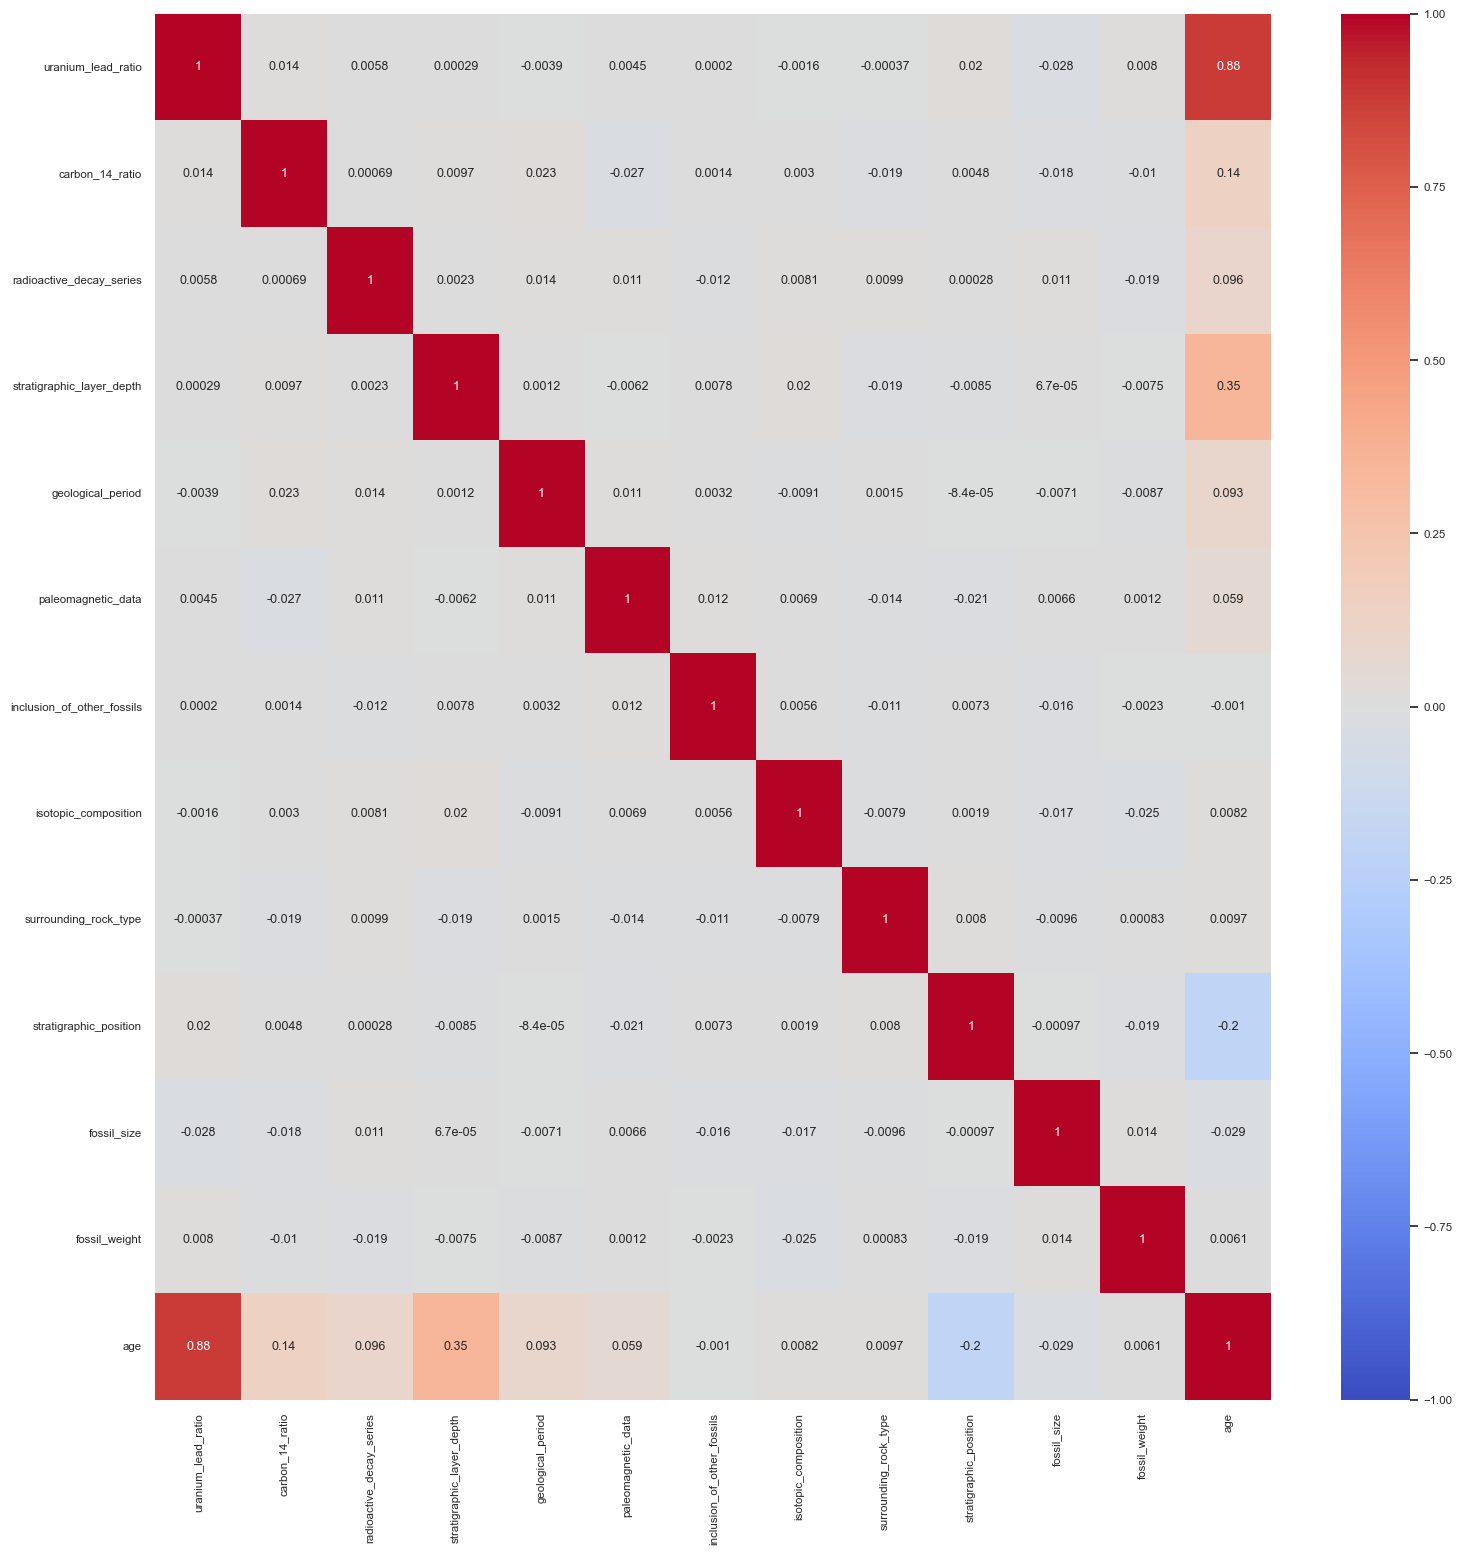

In [36]:
sns.set_theme(font_scale=0.75)
plt.figure(figsize=(18,18))
sns.heatmap(fossils.corr(),annot=True,cmap='coolwarm', vmin=-1, vmax=1)

plt.show()

## **Log Transforming Skew Variables**

In [49]:
skew_limit = 0.50 # define a limit above which we will log transform
skew_vals = fossils.skew()
skew_vals

uranium_lead_ratio            0.325867
carbon_14_ratio               0.314436
radioactive_decay_series      0.341603
stratigraphic_layer_depth     0.470472
geological_period             0.386234
paleomagnetic_data            1.003948
inclusion_of_other_fossils   -0.524367
isotopic_composition          0.464294
surrounding_rock_type        -0.257762
stratigraphic_position        0.985635
fossil_size                   0.319803
fossil_weight                 0.451555
age                           0.417600
dtype: float64

In [50]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
paleomagnetic_data          1.003948
stratigraphic_position      0.985635
inclusion_of_other_fossils -0.524367

In [ ]:
age_untransformed = sns.distplot(fossils['age'])

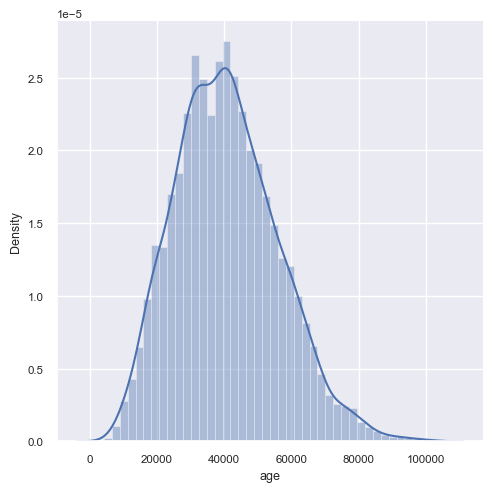

In [39]:
age_untransformed = sns.displot(fossils['age'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

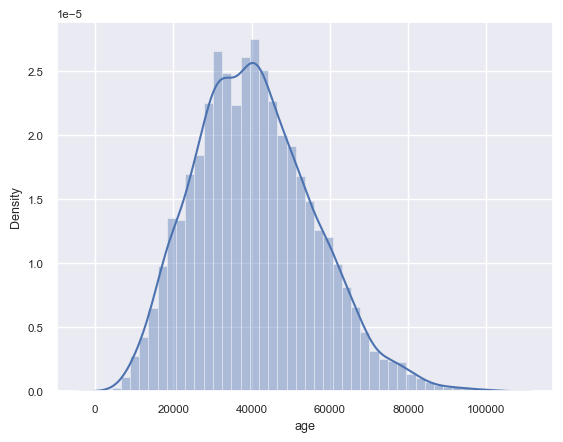

In [40]:
age_untransformed = sns.histplot(fossils['age'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

In [41]:
print("Skewness: %f" % fossils['age'].skew())

Skewness: 0.417600
